Kmeans Clustering method is a widely used clustering technique that seeks to minimize the average squared distance between points in the same cluster. Typically chosen uniformly at random from the data points. K means is an iterative clustering algorithm that aims to find local maxima in each iteration.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

Panel data with sales volume for a package of Borden Sliced Cheese as well as a measure of display activity and price. Weekly data aggregated to the "key" account or retailer/market level.

A data frame with 5555 observations on the following 4 variables:

...$RETAILER a list of 88 retailers

...$VOLUME unit sales

...$DISP percent ACV on display (a measure of advertising display activity)

...$PRICE in U.S. dollars

In [3]:
#import CSV file
df=pd.read_csv('Cheese.csv')
df.head()
df.shape

#Aggregate infromation at the store level
df_pivot = pd.pivot_table(df,values=['VOLUME','DISP','PRICE'], index='RETAILER', aggfunc=np.median)
df_pivot.head()
df_pivot.shape

,RETAILER,VOLUME,DISP,PRICE
1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
3,LOS ANGELES - VONS,17302,0.102000,2.711421
4,CHICAGO - DOMINICK,13561,0.027591,2.651206
5,CHICAGO - JEWEL,42774,0.090613,1.986674


(5555, 4)

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

In [4]:
#Scale all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler 
scld = MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld, columns=df_pivot.columns)
df_scld.head()
df_scld.describe()
df_scld.shape

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


,DISP,PRICE,VOLUME
count,88.000000,88.000000,88.000000
mean,0.201006,0.337239,0.252149
std,0.234245,0.214843,0.204063
min,0.000000,0.000000,0.000000
25%,0.000000,0.173638,0.105704
50%,0.099057,0.254668,0.217822
75%,0.343301,0.456079,0.326105
max,1.000000,1.000000,1.000000


(88, 3)

In [5]:
#Lets build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error=[]

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
    
df = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term": error})
df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,0.087082
1,3,0.063325
2,4,0.044077
3,5,0.035960
4,6,0.030709
5,7,0.026851
6,8,0.022781
7,9,0.020283


<Figure size 720x504 with 0 Axes>

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal number of cluster')

<function matplotlib.pyplot.show(*args, **kw)>

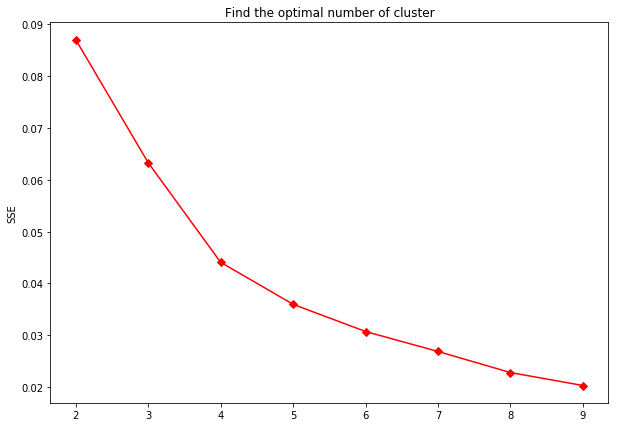

In [6]:
#Find out the right numbers of clusters
plt.figure(figsize=(10,7))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker="D", color='red')
plt.xlabel=('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show

In [7]:
# Build with 4 Clusters
clusters = KMeans(4)

# Train model
clusters.fit(df_scld)

# Show cluster membership
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 3, 2, 1, 1, 0, 0, 0, 3, 1, 2,
       0, 0, 3, 3, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 3, 1, 1, 2, 1, 0, 1, 2, 3, 2, 0, 1, 0, 0, 0, 2])

In [8]:
df_pivot['Cluster']=clusters.labels_
df_pivot.head()
df_pivot.tail()
df_pivot.shape

,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0,0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,2
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,2


,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
SYRACUSE - WEGMANS,0.227423,3.459383,807.0,1
TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,0
TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,0
TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,0
WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,2


(88, 4)

In [9]:
#Generate pivot table for 'VOLUME','DISP','PRICE' with mean of allaganist each clusters
cluster_profile = pd.pivot_table(df_pivot, values=['VOLUME','DISP','PRICE'], index='Cluster', aggfunc=np.mean)
np.round(cluster_profile,2)
df_pivot.groupby("Cluster").size()

,DISP,PRICE,VOLUME
Cluster,,,
0,0.03,2.61,3417.47
1,0.24,2.77,3463.58
2,0.05,3.54,2987.54
3,0.08,2.75,10864.50


Cluster
0    38
1    18
2    24
3     8
dtype: int64

<Figure size 720x576 with 0 Axes>

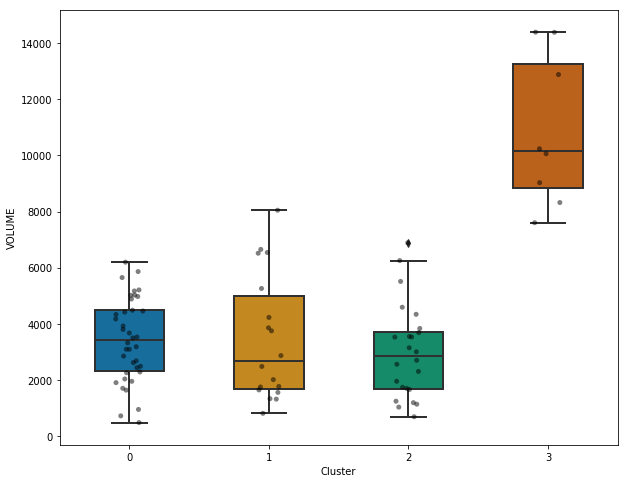

In [10]:
#Plot a graph with Volume and strip plot to know the outliners
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='VOLUME',width=0.5,palette="colorblind",  data=df_pivot,linewidth=2)
sns.stripplot(x='Cluster', y='VOLUME',  data=df_pivot,jitter=True,marker='o',alpha=0.5,color='black')
plt.show()

With above plot graph came to conclusion that in cluster 4 volume of the cheder cheese sale is more as compare to other clusters. Also the number of stores seems to be less in cluster 4 compare to other clusters.

<Figure size 720x576 with 0 Axes>

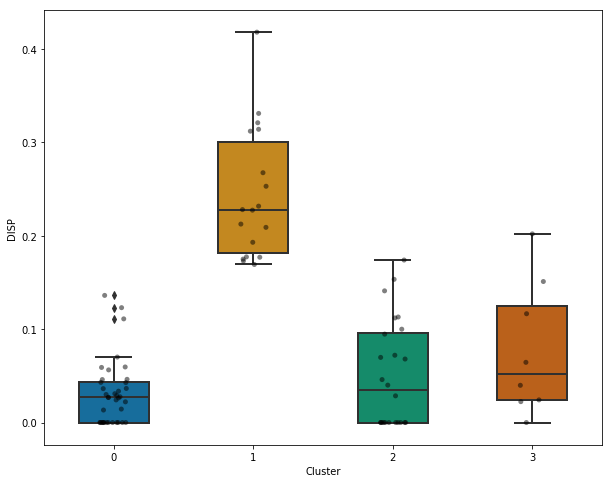

In [11]:
#Plot a graph with DISP and strip plot to know the outliners
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='DISP', width=0.5,palette="colorblind", data=df_pivot,linewidth=2)
sns.stripplot(x='Cluster', y='DISP',  data=df_pivot,jitter=True,marker='o',alpha=0.5,color='black')
plt.show()

Cluster No.1 has more number of stores investing more on advertising display activity comparing to other cluster stores.

<Figure size 720x576 with 0 Axes>

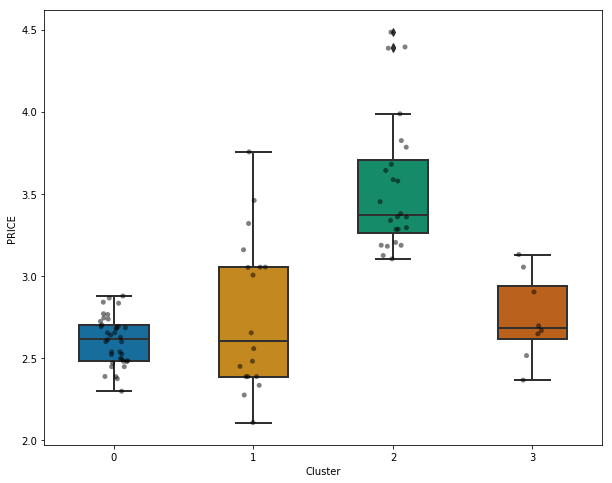

In [12]:
#Plot a graph with PRICE and strip plot to know the outliners
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y='PRICE',  width=0.5,palette="colorblind",data=df_pivot,linewidth=2)
sns.stripplot(x='Cluster', y='PRICE',  data=df_pivot,jitter=True,marker='o',alpha=0.5,color='black')
plt.show()

Price wise i can see cluster no: 0 stores charge more compating to other cluster stores while cluster No: 1 has less prices for similar type of cheese.